In [1]:
# Critical Kidney Disease Prediction

In [2]:
import numpy as np
import pandas as pd

# Read dataset file ckd.csv
#dataset = pd.read_csv(r"C:\Users\I346327\Desktop\Assignment_BLR\kidneyChronic.csv",header=0)
dataset = pd.read_csv(r"C:\Users\I346327\Desktop\Assignment_BLR\kidneyChronic.csv",header=0, na_values="?")
#stripping for any whitespaces or tabs
dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace null values "?" by numpy.NaN
dataset.replace('?', np.nan, inplace=True)

pd.set_option('display.max_columns',35)
dataset.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null object
wbcc     294 non-null object
rbcc     269 non-null object
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(11), object(14)
memory usage: 78.2+ KB


In [4]:
#Data Manipulation
#We can get a clear picture from the below that the columns which have white spaces in it contain null values.
!pip install missingno
import missingno

dataset.isna().sum()


age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

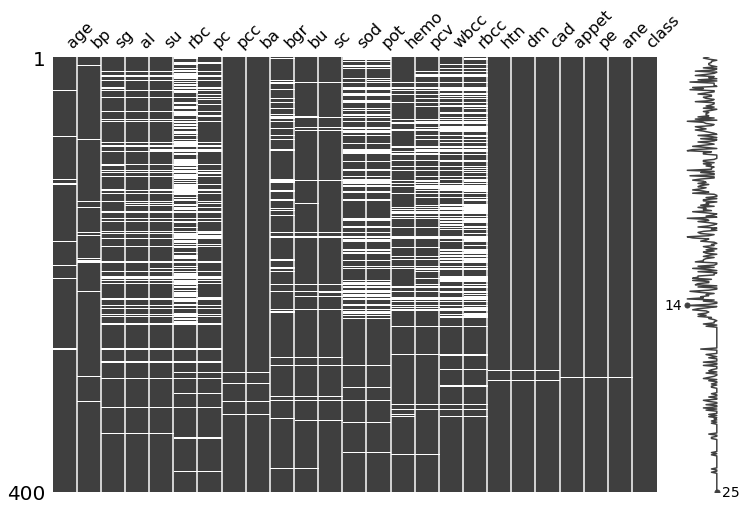

In [5]:
missingno.matrix(dataset,figsize=(12,8))

In [6]:
#Imputing the missing values
num_cols=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo']
obj_cols=['rbc','pc','pcc','ba','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class']

#dataset[num_cols]=dataset[num_cols].fillna(dataset[num_cols].mean())

dataset[num_cols] = dataset.groupby("class").transform(lambda x: x.fillna(x.mean()))
dataset[obj_cols]=dataset[obj_cols].fillna(dataset[obj_cols].mode().iloc[0])

#checking for null values after imputation
print(dataset.isnull().sum())
dataset.head(10)

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,133.901786,4.878443,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,175.419811,18.0,0.8,133.901786,4.878443,11.3,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,133.901786,4.878443,9.6,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,133.901786,4.878443,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.000,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.000000,25.0,1.1,142.000000,3.200000,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.000,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,54.0,24.0,104.000000,4.000000,12.4,36,9800,5.2,no,no,no,good,no,no,ckd
7,24.0,79.625,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,31.0,1.1,133.901786,4.878443,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,60.0,1.9,133.901786,4.878443,10.8,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53.0,90.000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,107.0,7.2,114.000000,3.700000,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


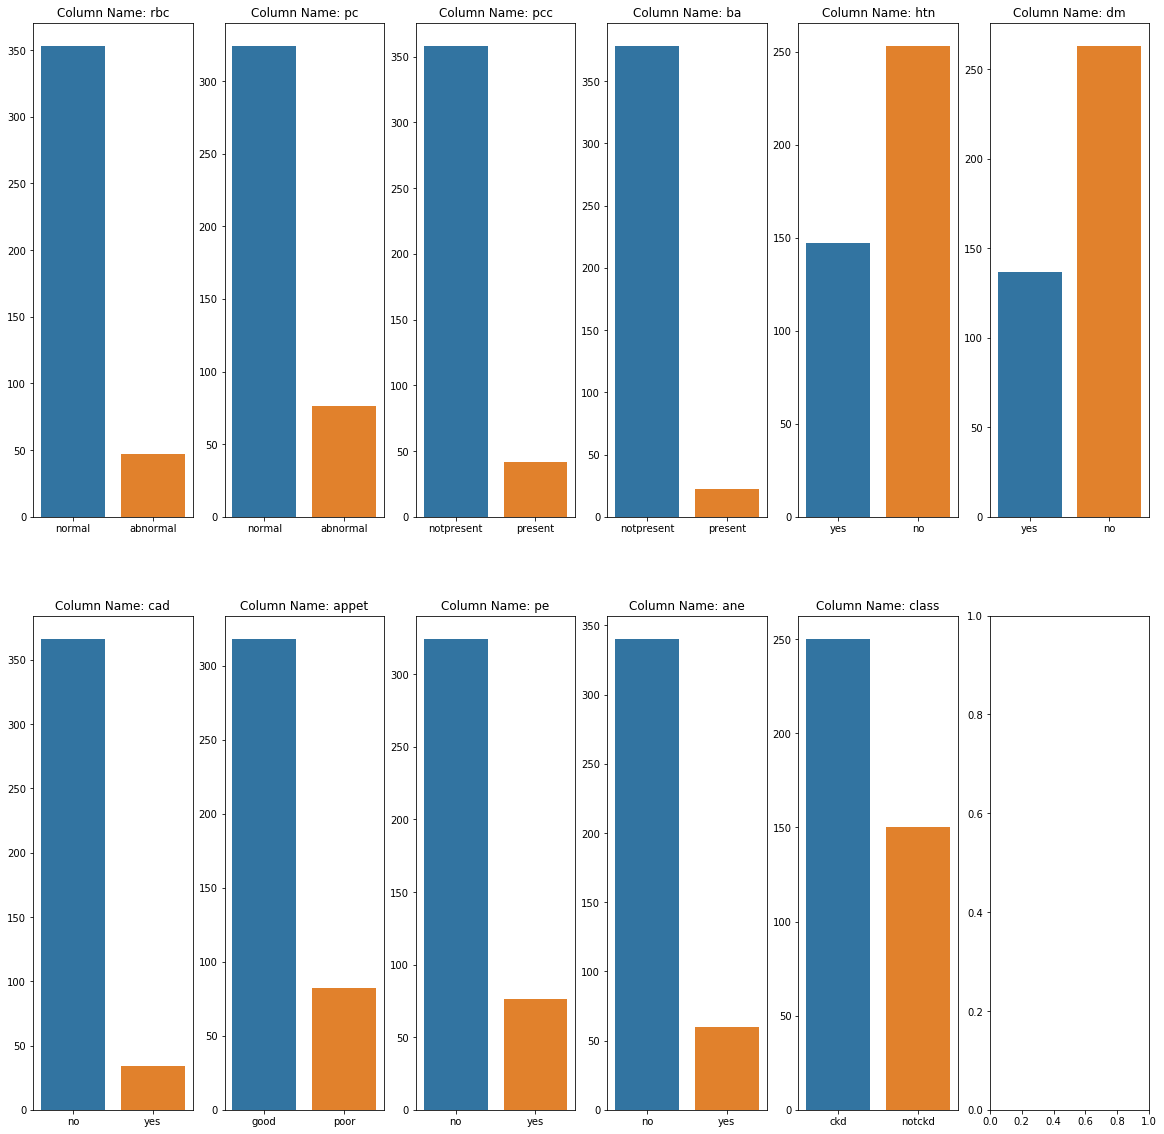

In [7]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def visulaize_plot(df,exclude_cols,target_col,object_mode=True):
    n=0
    this=[]
    
    if object_mode:
        n_rows=2
        n_cols=6
        width=20
        height=20
    else:
        n_rows=4
        n_cols=3
        width=20
        height=20
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column not in exclude_cols):
                this.append(column)
        else:
            if (df[column].dtypes != 'O') & (column != target_col):
                this.append(column)
                
    fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(width,height))
    
    for row in range(n_rows):
        for col in range(n_cols):
            if n < len(this):
                if object_mode:
                    g=sns.countplot(df[this[n]], ax=ax[row][col])
                else:
                    g=sns.distplot(df[this[n]], ax=ax[row][col])
                
                ax[row,col].set_title("Column Name: {}".format(this[n]))
                ax[row,col].set_xlabel("")
                ax[row,col].set_ylabel("")
                n += 1
            
    plt.show()
    return
exclude_cols=['pcv','wbcc','rbcc']

visulaize_plot(dataset, exclude_cols, 'class', object_mode=True)

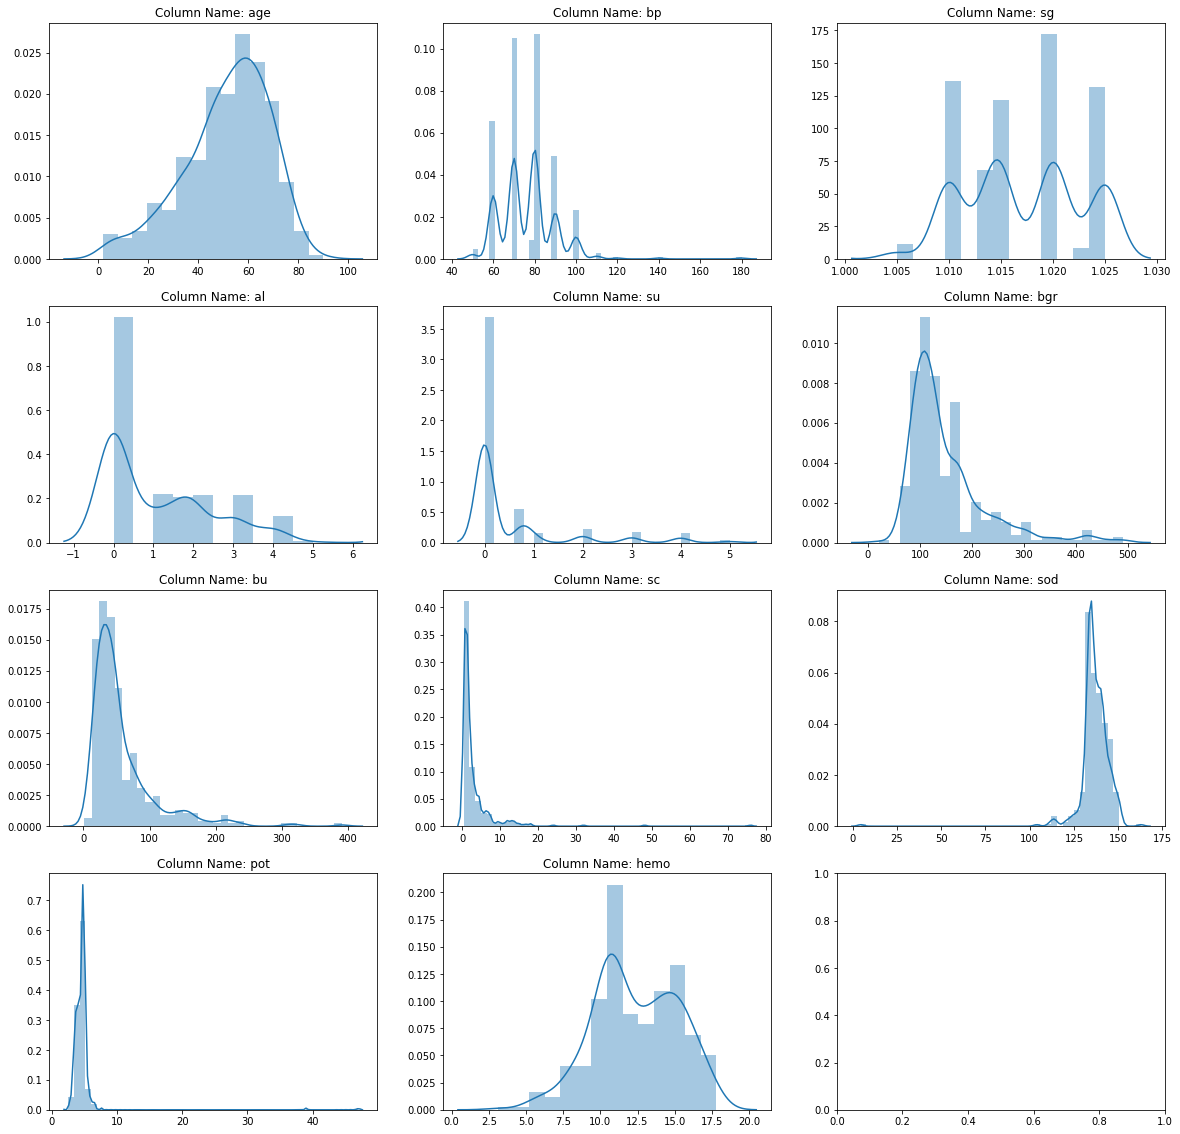

In [8]:
visulaize_plot(dataset, exclude_cols, 'class', object_mode=False)

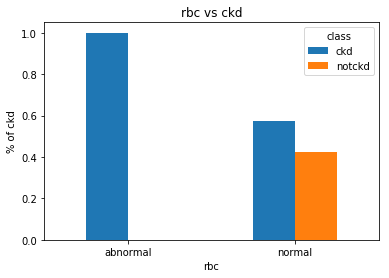

<Figure size 1152x864 with 0 Axes>

class,ckd,notckd
rbc,,
abnormal,100.000000,0.000000
normal,57.507082,42.492918


In [9]:
#Bi-Variate Analysis of categorical Variables
def bi_variate(df, col1, col2):
    if col2 == 'class':
        cross_name=pd.crosstab(df[col1], df[col2], normalize='index')
    else:
        cross_name=pd.crosstab(df[col1], df[col2]).apply(lambda x: x/x.sum() * 100, axis=0)
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of ckd')
    plt.title('{} vs ckd'.format(col1))
    plt.xticks(rotation=0)
    plt.figure(figsize=(16,12))
    plt.show()
    return cross_name*100

bi_variate(dataset, 'rbc', 'class')


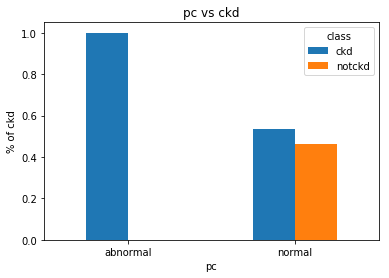

<Figure size 1152x864 with 0 Axes>

class,ckd,notckd
pc,,
abnormal,100.000000,0.000000
normal,53.703704,46.296296


In [10]:
bi_variate(dataset, 'pc', 'class')

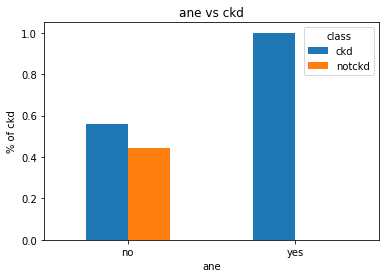

<Figure size 1152x864 with 0 Axes>

class,ckd,notckd
ane,,
no,55.882353,44.117647
yes,100.000000,0.000000


In [11]:
bi_variate(dataset, 'ane', 'class')

In [12]:
### We could able to infer that either of the categorical attribte is present/true ---> Then CKD is present.

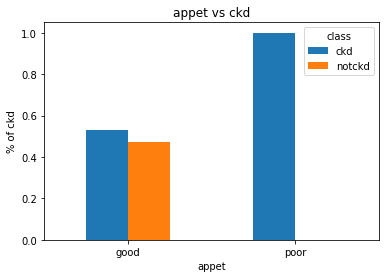

<Figure size 1152x864 with 0 Axes>

class,ckd,notckd
appet,,
good,52.830189,47.169811
poor,100.000000,0.000000


In [13]:
bi_variate(dataset, 'appet', 'class')

In [14]:
dataset.head(10)
#Encoding (categorical to Numerical)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#target column
target_col=['class']

#categorical cols
categorical_cols=dataset.nunique()[dataset.nunique() < 5].keys().tolist()
categorical_cols=[x for x in categorical_cols if x not in target_col]
print("categorical columns: {}".format(categorical_cols))

#numerical cols
cont_cols=[x for x in dataset.columns if x not in categorical_cols+target_col]
print("Numerical columns: {}".format(cont_cols))

#binary cols
bin_cols=dataset.nunique()[dataset.nunique() == 2].keys().tolist()
print("Binary columns: {}".format(bin_cols))

#multi cols(more than 2 values)
mul_cols=[x for x in categorical_cols if x not in bin_cols]
print("Multi valued columns: {}".format(mul_cols))


#Label Encoding for Binary cols
le=LabelEncoder()
for i in bin_cols:
    dataset[i]=le.fit_transform(dataset[i])

#Duplicating cols for multi-value cols
dataset=pd.get_dummies(data=dataset,columns=mul_cols)
dataset.head(10)


categorical columns: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Numerical columns: ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
Binary columns: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
Multi valued columns: []


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,133.901786,4.878443,15.4,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.000,1.020,4.0,0.0,1,1,0,0,175.419811,18.0,0.8,133.901786,4.878443,11.3,38,6000,5.2,0,0,0,0,0,0,0
2,62.0,80.000,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,133.901786,4.878443,9.6,31,7500,5.2,0,1,0,1,0,1,0
3,48.0,70.000,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.000,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,133.901786,4.878443,11.6,35,7300,4.6,0,0,0,0,0,0,0
5,60.0,90.000,1.015,3.0,0.0,1,1,0,0,74.000000,25.0,1.1,142.000000,3.200000,12.2,39,7800,4.4,1,1,0,0,1,0,0
6,68.0,70.000,1.010,0.0,0.0,1,1,0,0,100.000000,54.0,24.0,104.000000,4.000000,12.4,36,9800,5.2,0,0,0,0,0,0,0
7,24.0,79.625,1.015,2.0,4.0,1,0,0,0,410.000000,31.0,1.1,133.901786,4.878443,12.4,44,6900,5,0,1,0,0,1,0,0
8,52.0,100.000,1.015,3.0,0.0,1,0,1,0,138.000000,60.0,1.9,133.901786,4.878443,10.8,33,9600,4,1,1,0,0,0,1,0
9,53.0,90.000,1.020,2.0,0.0,0,0,1,0,70.000000,107.0,7.2,114.000000,3.700000,9.5,29,12100,3.7,1,1,0,1,0,1,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text xticklabel objects>)

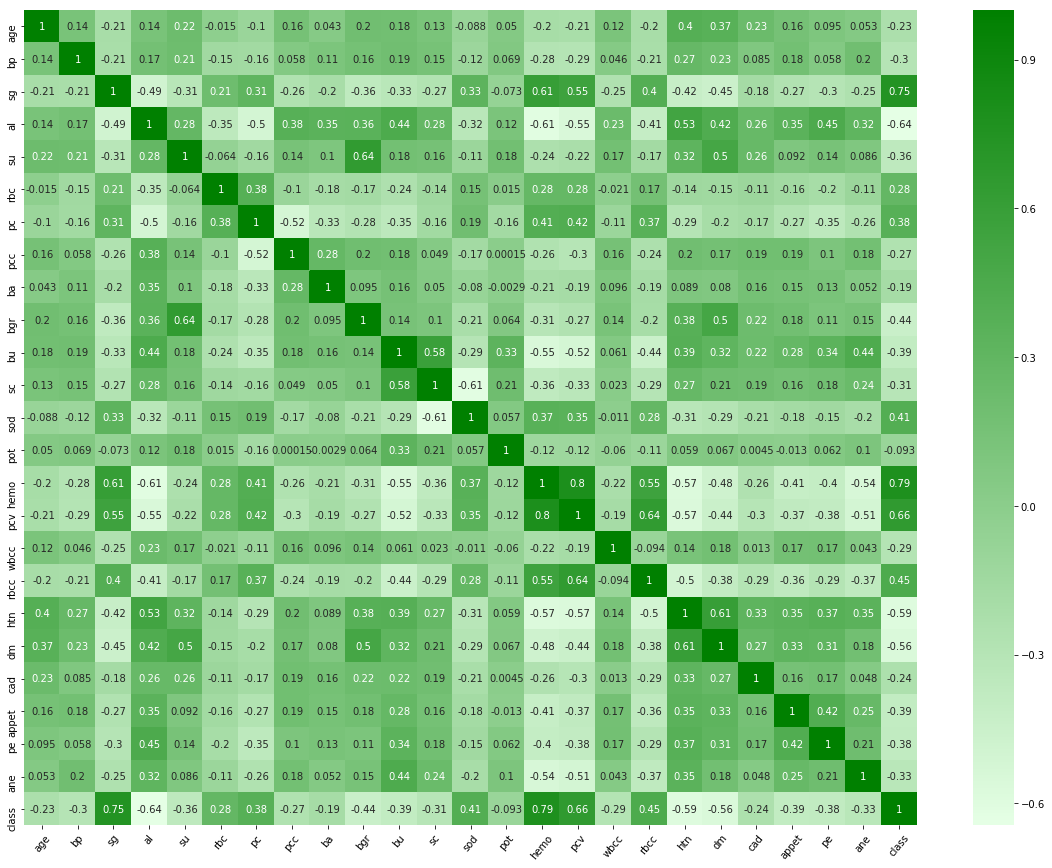

In [15]:
for i in cont_cols:
    dataset[i] = pd.to_numeric(dataset[i], errors='coerce')
#Co-relation 
#correlation analysis shows us how to determine both the nature and strength of relationship between two variables
#correaltion lies between -1 to 1 (0: No corelation; -1: perfect negative correlation; +1: positive core)
correlation=dataset.corr()
correlation

#plotting correlation Matrix
plt.figure(figsize=(20,15))
cm = sns.light_palette("green", as_cmap=True)
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, cmap=cm, annot=True)
plt.xticks(rotation=50)

In [16]:
#Normalizing Features
from sklearn.preprocessing import MinMaxScaler

ckd_dataset = dataset
minmax=MinMaxScaler()
ckd_dataset[cont_cols]=minmax.fit_transform(ckd_dataset[cont_cols].values)
dataset=ckd_dataset

dataset.to_csv(r"C:\Users\I346327\Desktop\Assignment_BLR\preprocessed.csv", sep=',', index=False)
dataset.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,0.211538,0.088575,0.010582,0.816415,0.053448,0.836735,0.777778,0.231405,0.525424,1,1,0,0,0,0,0
1,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,0.327820,0.042362,0.005291,0.816415,0.053448,0.557823,0.644444,0.157025,0.525424,0,0,0,0,0,0,0
2,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,0.856838,0.132221,0.018519,0.816415,0.053448,0.442177,0.488889,0.219008,0.525424,0,1,0,1,0,1,0
3,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085,1,0,0,1,1,1,0
4,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,0.179487,0.062901,0.013228,0.816415,0.053448,0.578231,0.577778,0.210744,0.423729,0,0,0,0,0,0,0
5,0.659091,0.307692,0.50,0.6,0.0,1,1,0,0,0.111111,0.060334,0.009259,0.867508,0.015730,0.619048,0.666667,0.231405,0.389831,1,1,0,0,1,0,0
6,0.750000,0.153846,0.25,0.0,0.0,1,1,0,0,0.166667,0.134788,0.312169,0.627760,0.033708,0.632653,0.600000,0.314050,0.525424,0,0,0,0,0,0,0
7,0.250000,0.227885,0.50,0.4,0.8,1,0,0,0,0.829060,0.075738,0.009259,0.816415,0.053448,0.632653,0.777778,0.194215,0.491525,0,1,0,0,1,0,0
8,0.568182,0.384615,0.50,0.6,0.0,1,0,1,0,0.247863,0.150193,0.019841,0.816415,0.053448,0.523810,0.533333,0.305785,0.322034,1,1,0,0,0,1,0
9,0.579545,0.307692,0.75,0.4,0.0,0,0,1,0,0.102564,0.270860,0.089947,0.690852,0.026966,0.435374,0.444444,0.409091,0.271186,1,1,0,1,0,1,0


In [17]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
!pip install pycm
from pycm import *


#Function to import my pre-processed dataset
def importData():
    processed_data = pd.read_csv(r"C:\Users\I346327\Desktop\Assignment_BLR\preprocessed.csv", sep=',', header=0)
    print("dataset length: ", len(processed_data))
    print("dataset shape: ", processed_data.shape)
    return processed_data
    
#Function to split the dataset
def splitDataset(processed_data):
    #seperating the target varibale
    x = processed_data.values[:,0:24]
    y = processed_data.values[:,-1]
    
    #print(x)
    #print(y)
    
    #splitting the dataset into train and test
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)
    
    return x, y, x_train, x_test, y_train, y_test


#Function to perform training with giniIndex

def trainUsingGini(x_train, y_train):
    classification_gini_model = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    classification_gini_model.fit(x_train, y_train)
    #print(classification_gini_model)
    return classification_gini_model

#Function to perform training with Entropy
def trainUsingEntropy(x_train, y_train):
    classification_entropy_model = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
    classification_entropy_model.fit(x_train, y_train)
    #print(classification_entropy_model)
    return classification_entropy_model

#Function to perform training with Entropy
def trainUsingNaiveBayes(x_train, y_train):
    classification_NaiveBayes_model = GaussianNB()
    classification_NaiveBayes_model.fit(x_train, y_train)
    #print(classification_NaiveBayes_model)
    return classification_NaiveBayes_model

#Function to perform training with SVM with linear kernel
def trainUsingSVM(x_train, y_train):
    classification_SVM_model = SVC(kernel='linear')
    classification_SVM_model.fit(x_train, y_train)
    #print(classification_SVM_model)
    return classification_SVM_model

def trainUsingRandomForest(x_train, y_train):
    classification_RF_model = RandomForestClassifier(n_estimators=100)
    classification_RF_model.fit(x_train, y_train)
    #print(classification_RF_model)
    return classification_RF_model

def prediction(x_test, classification_object):
    y_pred = classification_object.predict(x_test)
    return y_pred

def calculate_accuracy(y_test, y_pred):
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
    
def displayModelStats(y_test,y_pred,model_name):
    cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
    print("\n ************************************************************************************\n")
    print("\nConfusion Matrix :",model_name)
    cm.print_normalized_matrix()
    print("\nAccuracy :",cm.ACC[1])
    print("\nDetailed Analysis for Model :",model_name)
    cm.stat(summary=True)
    
########
#Main
########
def main():
    data = importData()
    x, y, x_train, x_test, y_train, y_test = splitDataset(data)
    
    classification_gini_model = trainUsingGini(x_train, y_train)
    classification_entropy_model = trainUsingEntropy(x_train, y_train)
    classification_NaiveBayes_model = trainUsingNaiveBayes(x_train, y_train)
    classification_SVM_model = trainUsingSVM(x_train, y_train)
    classification_RF_model = trainUsingRandomForest(x_train, y_train)
    
    print("\n Results Using Gini Index:")
    y_pred_gini = prediction(x_test, classification_gini_model)
    calculate_accuracy(y_test, y_pred_gini)
    
    print("\n Results Using Entropy:")
    y_pred_entropy = prediction(x_test, classification_entropy_model)
    calculate_accuracy(y_test, y_pred_entropy)
    
    print("\n Results Using NaiveBayes:")
    y_pred_NB = prediction(x_test, classification_NaiveBayes_model)
    calculate_accuracy(y_test, y_pred_NB)
    
    print("\n Results Using SVM:")
    y_pred_SVM = prediction(x_test, classification_SVM_model)
    calculate_accuracy(y_test, y_pred_SVM)
    
    print("\n Results Using Random Forest:")
    y_pred_RF = prediction(x_test, classification_RF_model)
    calculate_accuracy(y_test, y_pred_RF)
    
    displayModelStats(y_test,y_pred_gini,"Decision Tree Classifier - Gini Index")
    displayModelStats(y_test,y_pred_RF,"Random Forest")
    
    
    
if __name__=="__main__":
    main()
    

dataset length:  400
dataset shape:  (400, 25)

 Results Using Gini Index:
Confusion Matrix: 
 [[80  0]
 [ 2 38]]
Accuracy :  98.33333333333333

 Results Using Entropy:
Confusion Matrix: 
 [[80  0]
 [ 0 40]]
Accuracy :  100.0

 Results Using NaiveBayes:
Confusion Matrix: 
 [[79  1]
 [ 0 40]]
Accuracy :  99.16666666666667

 Results Using SVM:
Confusion Matrix: 
 [[80  0]
 [ 0 40]]
Accuracy :  100.0

 Results Using Random Forest:
Confusion Matrix: 
 [[80  0]
 [ 0 40]]
Accuracy :  100.0

 ************************************************************************************


Confusion Matrix : Decision Tree Classifier - Gini Index
Predict    0.0        1.0        
Actual
0.0        1.0        0.0        

1.0        0.05       0.95       



Accuracy : 0.9833333333333333

Detailed Analysis for Model : Decision Tree Classifier - Gini Index
Overall Statistics : 

ACC Macro                                                         0.98333
F1 Macro                                                